## 6 边缘直方图 （Marginal Histogram）
边缘直方图具有沿 X 和 Y 轴变量的直方图。 这用于可视化 X 和 Y 之间的关系以及单独的 X 和 Y 的单变量分布。 这种图经常用于探索性数据分析（EDA）。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


d:\datacenterkun\jupyter\venv\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


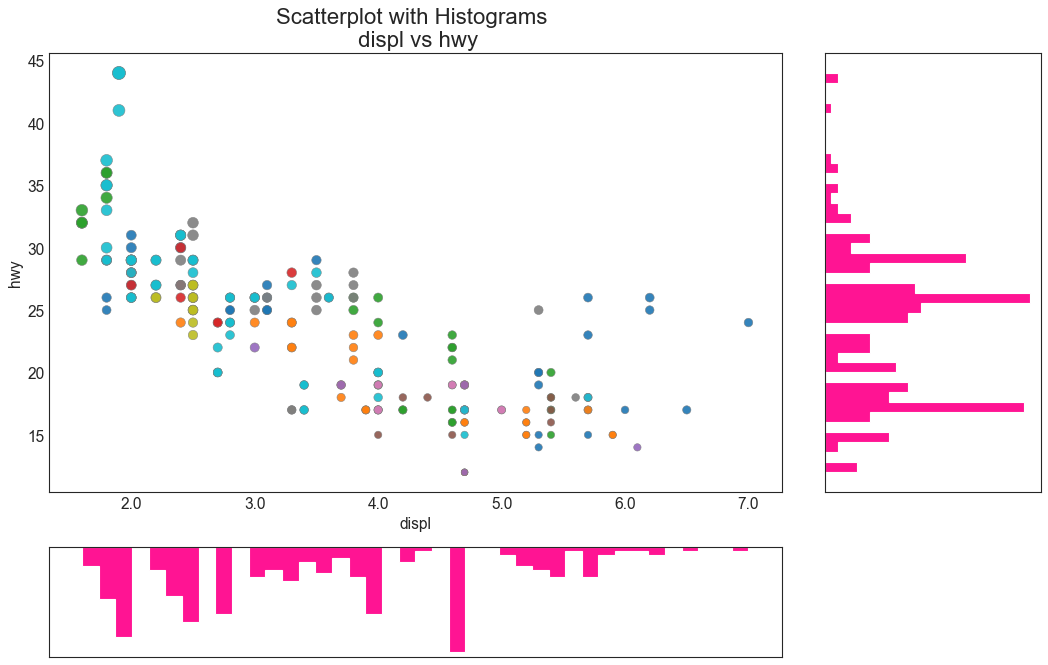

In [2]:
# Import Data
df = pd.read_csv("datasets/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()